<a href="https://colab.research.google.com/github/AjMing/Pattern-EGCI463/blob/main/week6/Face_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

 # Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lfw_dataset.images.shape


(1140, 62, 47)

In [ ]:
# Compute a PCA
n_components = 700
pca = PCA(.97, whiten=True).fit(X_train)

# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(798, 204)
(342, 204)


In [ ]:
# train a neural network
print("Fitting the classifier to the training set")
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1,verbose=1)

Fitting the classifier to the training set
Iteration 1, loss = 1.55008986
Validation score: 0.525000
Iteration 2, loss = 1.07640404
Validation score: 0.575000
Iteration 3, loss = 0.80599924
Validation score: 0.700000
Iteration 4, loss = 0.58312980
Validation score: 0.787500
Iteration 5, loss = 0.42869225
Validation score: 0.875000
Iteration 6, loss = 0.32254747
Validation score: 0.875000
Iteration 7, loss = 0.24581498
Validation score: 0.887500
Iteration 8, loss = 0.18938388
Validation score: 0.912500
Iteration 9, loss = 0.14764583
Validation score: 0.912500
Iteration 10, loss = 0.11772643
Validation score: 0.912500
Iteration 11, loss = 0.09463254
Validation score: 0.912500
Iteration 12, loss = 0.07735813
Validation score: 0.912500
Iteration 13, loss = 0.06393445
Validation score: 0.912500
Iteration 14, loss = 0.05353704
Validation score: 0.912500
Iteration 15, loss = 0.04599528
Validation score: 0.912500
Iteration 16, loss = 0.04000142
Validation score: 0.912500
Iteration 17, loss = 0

In [ ]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.87      0.82      0.84        71
  Donald Rumsfeld       0.83      0.61      0.70        33
    George W Bush       0.86      0.95      0.90       169
Gerhard Schroeder       0.79      0.86      0.82        35
       Tony Blair       0.88      0.68      0.77        34

         accuracy                           0.85       342
        macro avg       0.85      0.78      0.81       342
     weighted avg       0.85      0.85      0.85       342



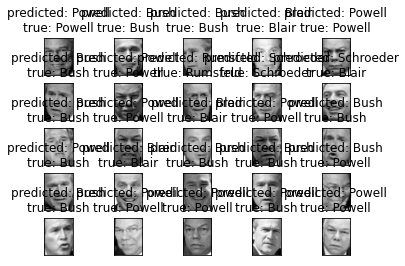

In [ ]:
# Visualization
def plot_gallery(images, titles, h, w, rows=5, cols=5):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)

prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)